In [ ]:
!python -V  

Python 3.9.21


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.metrics import mean_squared_error

from sklearn.metrics import root_mean_squared_error

In [6]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment('nyc-taxi_example')

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment_tracking/mlruns/8', creation_time=1747596641786, experiment_id='8', last_update_time=1747596641786, lifecycle_stage='active', name='nyc-taxi_example', tags={}>

In [7]:
df = pd.read_parquet('/workspaces/mlops-zoomcamp/data/green_tripdata_2021-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)
display(df)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [8]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

9.838799799829577

/tmp/ipykernel_16670/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')


/tmp/ipykernel_16670/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


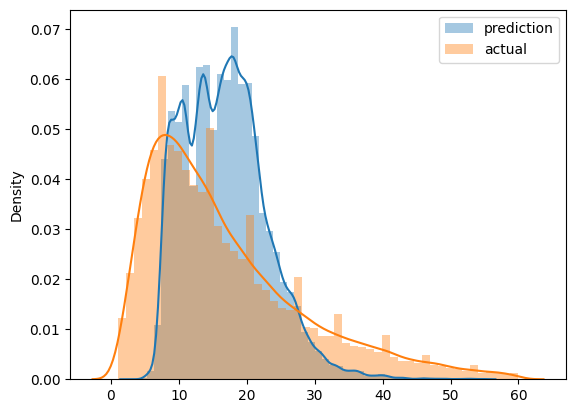

In [9]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [10]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [11]:
df_train = read_dataframe('/workspaces/mlops-zoomcamp/data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('/workspaces/mlops-zoomcamp/data/green_tripdata_2021-02.parquet')

In [12]:
len(df_train), len(df_val)

(73908, 61921)

In [13]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [14]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [15]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.758715209663881

In [17]:
with open('/workspaces/mlops-zoomcamp/models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [18]:
with mlflow.start_run():

    mlflow.set_tag("developer", "mauricio")

    mlflow.log_param("train-data-path", "/workspaces/mlops-zoomcamp/data/green_tripdata_2021-01.parquet")
    mlflow.log_param("valid-data-path", "/workspaces/mlops-zoomcamp/data/green_tripdata_2021-02.parquet")

    alpha = 0.1
    mlflow.log_param("alpha", alpha)
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    mlflow.log_metric("rmse", rmse)

In [19]:
import xgboost as xgb

In [20]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [21]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [30]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:44:21] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.06392                          
[1]	validation-rmse:8.70531                           
[2]	validation-rmse:7.87753                           
[3]	validation-rmse:7.38283                           
[4]	validation-rmse:7.09116                           
[5]	validation-rmse:6.91883                           
[6]	validation-rmse:6.81026                           
[7]	validation-rmse:6.73983                           
[8]	validation-rmse:6.69657                           
[9]	validation-rmse:6.66667                           
[10]	validation-rmse:6.64714                          
[11]	validation-rmse:6.62984                          
[12]	validation-rmse:6.61751                          
[13]	validation-rmse:6.60752                          
[14]	validation-rmse:6.59860                          
[15]	validation-rmse:6.59058                          
[16]	validation-rmse:6.58412                          
[17]	validation-rmse:6.57963                          
[18]	valid

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:46:20] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.83043                                                        
[1]	validation-rmse:8.43556                                                        
[2]	validation-rmse:7.64256                                                        
[3]	validation-rmse:7.21075                                                        
[4]	validation-rmse:6.96849                                                        
[5]	validation-rmse:6.83368                                                        
[6]	validation-rmse:6.75247                                                        
[7]	validation-rmse:6.70317                                                        
[8]	validation-rmse:6.67459                                                        
[9]	validation-rmse:6.65190                                                        
[10]	validation-rmse:6.63983                                                       
[11]	validation-rmse:6.63177                                                

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:48:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.49679                                                       
[1]	validation-rmse:10.86266                                                       
[2]	validation-rmse:10.30317                                                       
[3]	validation-rmse:9.81150                                                        
[4]	validation-rmse:9.38022                                                        
[5]	validation-rmse:9.00382                                                        
[6]	validation-rmse:8.67538                                                        
[7]	validation-rmse:8.38967                                                        
[8]	validation-rmse:8.14138                                                        
[9]	validation-rmse:7.92735                                                        
[10]	validation-rmse:7.74217                                                       
[11]	validation-rmse:7.58191                                                

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:50:40] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:6.67284                                                       
[1]	validation-rmse:6.57524                                                       
[2]	validation-rmse:6.56130                                                       
[3]	validation-rmse:6.55027                                                       
[4]	validation-rmse:6.54328                                                       
[5]	validation-rmse:6.53056                                                       
[6]	validation-rmse:6.52438                                                       
[7]	validation-rmse:6.51456                                                       
[8]	validation-rmse:6.50734                                                       
[9]	validation-rmse:6.50239                                                       
[10]	validation-rmse:6.49539                                                      
[11]	validation-rmse:6.48875                                                      
[12]

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:51:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.83927                                                      
[1]	validation-rmse:7.50188                                                      
[2]	validation-rmse:7.00789                                                      
[3]	validation-rmse:6.82444                                                      
[4]	validation-rmse:6.73648                                                      
[5]	validation-rmse:6.69681                                                      
[6]	validation-rmse:6.67460                                                      
[7]	validation-rmse:6.65178                                                      
[8]	validation-rmse:6.64281                                                      
[9]	validation-rmse:6.63515                                                      
[10]	validation-rmse:6.63101                                                     
[11]	validation-rmse:6.62876                                                     
[12]	validation-

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:52:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.68381                                                      
[1]	validation-rmse:6.87492                                                      
[2]	validation-rmse:6.70744                                                      
[3]	validation-rmse:6.65635                                                      
[4]	validation-rmse:6.63900                                                      
[5]	validation-rmse:6.62106                                                      
[6]	validation-rmse:6.61308                                                      
[7]	validation-rmse:6.60763                                                      
[8]	validation-rmse:6.60138                                                      
[9]	validation-rmse:6.59518                                                      
[10]	validation-rmse:6.58937                                                     
[11]	validation-rmse:6.58867                                                     
[12]	validation-

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:53:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.33730                                                   
[1]	validation-rmse:10.58685                                                   
[2]	validation-rmse:9.94652                                                    
[3]	validation-rmse:9.40277                                                    
[4]	validation-rmse:8.94215                                                    
[5]	validation-rmse:8.55559                                                    
[6]	validation-rmse:8.23099                                                    
[7]	validation-rmse:7.95956                                                    
[8]	validation-rmse:7.73362                                                    
[9]	validation-rmse:7.54655                                                    
[10]	validation-rmse:7.39089                                                   
[11]	validation-rmse:7.26139                                                   
[12]	validation-rmse:7.15385            

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:55:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.36147                                                     
[1]	validation-rmse:9.09610                                                      
[2]	validation-rmse:8.25497                                                      
[3]	validation-rmse:7.70572                                                      
[4]	validation-rmse:7.35090                                                      
[5]	validation-rmse:7.12171                                                      
[6]	validation-rmse:6.97391                                                      
[7]	validation-rmse:6.87819                                                      
[8]	validation-rmse:6.81381                                                      
[9]	validation-rmse:6.76867                                                      
[10]	validation-rmse:6.73697                                                     
[11]	validation-rmse:6.71457                                                     
[12]	validation-

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:56:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.06910                                                     
[1]	validation-rmse:10.14182                                                     
[2]	validation-rmse:9.39593                                                      
[3]	validation-rmse:8.80218                                                      
[4]	validation-rmse:8.33247                                                      
[5]	validation-rmse:7.96435                                                      
[6]	validation-rmse:7.67672                                                      
[7]	validation-rmse:7.45342                                                      
[8]	validation-rmse:7.27920                                                      
[9]	validation-rmse:7.14409                                                      
[10]	validation-rmse:7.03915                                                     
[11]	validation-rmse:6.95522                                                     
[12]	validation-

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:00:33] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.01848                                                       
[1]	validation-rmse:7.58832                                                       
[2]	validation-rmse:6.99118                                                       
[3]	validation-rmse:6.73813                                                       
[4]	validation-rmse:6.62016                                                       
[5]	validation-rmse:6.55989                                                       
[6]	validation-rmse:6.53170                                                       
[7]	validation-rmse:6.51388                                                       
[8]	validation-rmse:6.50213                                                       
[9]	validation-rmse:6.49572                                                       
[10]	validation-rmse:6.49232                                                      
[11]	validation-rmse:6.48815                                                      
[12]

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:01:42] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.80200                                                       
[1]	validation-rmse:11.41865                                                       
[2]	validation-rmse:11.06112                                                       
[3]	validation-rmse:10.72841                                                       
[4]	validation-rmse:10.41870                                                       
[5]	validation-rmse:10.13116                                                       
[6]	validation-rmse:9.86378                                                        
[7]	validation-rmse:9.61518                                                        
[8]	validation-rmse:9.38525                                                        
[9]	validation-rmse:9.17261                                                        
[10]	validation-rmse:8.97654                                                       
[11]	validation-rmse:8.79437                                                

/home/codespace/anaconda3/envs/tracking-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:04:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.60694                                                       
[1]	validation-rmse:11.06029                                                       
[2]	validation-rmse:10.56801                                                       
[3]	validation-rmse:10.12662                                                       
[4]	validation-rmse:9.73003                                                        
 22%|██▏       | 11/50 [20:05<1:21:31, 125.43s/trial, best loss: 39.98865286244968]